<a href="https://colab.research.google.com/github/jefersondaniel/machine-learning-studies/blob/master/examples/recurrent/imdb_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.14

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Activation, Dense
from tensorflow.keras.optimizers import RMSprop

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000, skip_top=10)

X_train = sequence.pad_sequences(X_train, maxlen=80)
X_test = sequence.pad_sequences(X_test, maxlen=80)

X_train.shape

17465344/17464789 [==============================] - 0s 0us/step


(25000, 80)

In [13]:
model = Sequential()
model.add(Embedding(1000, 30, input_length=80))
model.add(LSTM(64, input_dim=30, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 80, 30)            30000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 54,385
Trainable params: 54,385
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 50s 2ms/sample - loss: 0.5981 - acc: 0.6773 - val_loss: 0.4665 - val_acc: 0.7730
Epoch 2/10
20000/20000 [==============================] - 49s 2ms/sample - loss: 0.4810 - acc: 0.7743 - val_loss: 0.4636 - val_acc: 0.7788
Epoch 3/10
20000/20000 [==============================] - 49s 2ms/sample - loss: 0.4560 - acc: 0.7946 - val_loss: 0.4536 - val_acc: 0.7808
Epoch 4/10
20000/20000 [==============================] - 49s 2ms/sample - loss: 0.4469 - acc: 0.7988 - val_loss: 0.4648 - val_acc: 0.7798
Epoch 5/10
20000/20000 [==============================] - 49s 2ms/sample - loss: 0.4340 - acc: 0.8036 - val_loss: 0.4422 - val_acc: 0.7938
Epoch 6/10
20000/20000 [==============================] - 48s 2ms/sample - loss: 0.4252 - acc: 0.8105 - val_loss: 0.4702 - val_acc: 0.7996
Epoch 7/10
20000/20000 [==============================] - 49s 2ms/sample - loss: 0.4177 - acc: 0.8120 - val_loss: 0.4

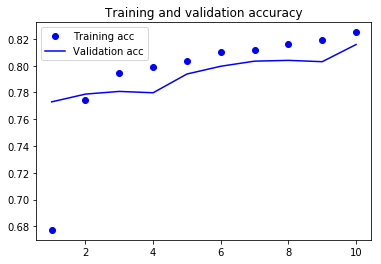

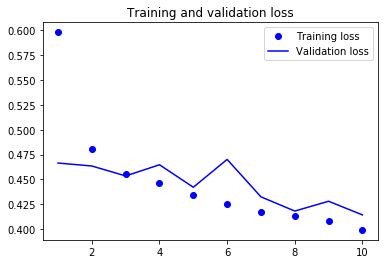

In [14]:
model.compile(
    optimizer=RMSprop(lr=1e-3),
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2
)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()